In [2]:
import gzip
from collections import defaultdict
import math
import scipy.optimize
from sklearn import svm
import numpy as np
import string
import random
import string
import pandas as pd
from sklearn import linear_model
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

# EDA

In [13]:
file_path = 'meta_All_Beauty.jsonl.gz'

# Load the data
data = []
with gzip.open(file_path, 'rt', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))

In [14]:
print(data[0])

{'main_category': 'All Beauty', 'title': 'Howard LC0008 Leather Conditioner, 8-Ounce (4-Pack)', 'average_rating': 4.8, 'rating_number': 10, 'features': [], 'description': [], 'price': None, 'images': [{'thumb': 'https://m.media-amazon.com/images/I/41qfjSfqNyL._SS40_.jpg', 'large': 'https://m.media-amazon.com/images/I/41qfjSfqNyL.jpg', 'variant': 'MAIN', 'hi_res': None}, {'thumb': 'https://m.media-amazon.com/images/I/41w2yznfuZL._SS40_.jpg', 'large': 'https://m.media-amazon.com/images/I/41w2yznfuZL.jpg', 'variant': 'PT01', 'hi_res': 'https://m.media-amazon.com/images/I/71i77AuI9xL._SL1500_.jpg'}], 'videos': [], 'store': 'Howard Products', 'categories': [], 'details': {'Package Dimensions': '7.1 x 5.5 x 3 inches; 2.38 Pounds', 'UPC': '617390882781'}, 'parent_asin': 'B01CUPMQZE', 'bought_together': None}


In [15]:
df = pd.DataFrame(data)


In [16]:
print(df.head())
print(df.info())

  main_category                                              title  \
0    All Beauty  Howard LC0008 Leather Conditioner, 8-Ounce (4-...   
1    All Beauty  Yes to Tomatoes Detoxifying Charcoal Cleanser ...   
2    All Beauty   Eye Patch Black Adult with Tie Band (6 Per Pack)   
3    All Beauty  Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...   
4    All Beauty  Precision Plunger Bars for Cartridge Grips – 9...   

   average_rating  rating_number  \
0             4.8             10   
1             4.5              3   
2             4.4             26   
3             3.1            102   
4             4.3              7   

                                            features  \
0                                                 []   
1                                                 []   
2                                                 []   
3                                                 []   
4  [Material: 304 Stainless Steel; Brass tip, Len...   

                         

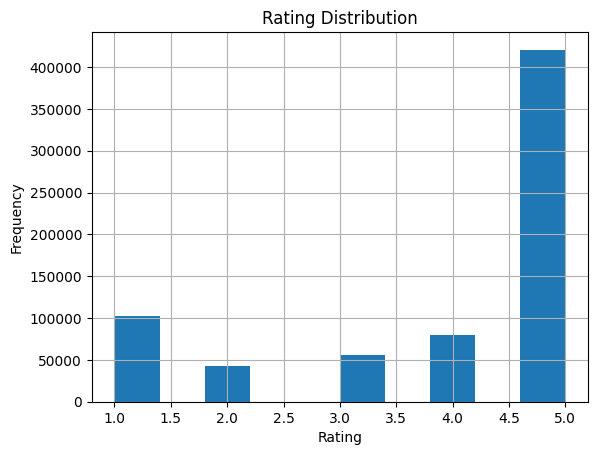

In [8]:
df['rating'].hist(bins=10)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

                     rating  timestamp  helpful_vote  verified_purchase
rating             1.000000  -0.071666      0.004743          -0.024965
timestamp         -0.071666   1.000000     -0.066824           0.100116
helpful_vote       0.004743  -0.066824      1.000000          -0.010453
verified_purchase -0.024965   0.100116     -0.010453           1.000000


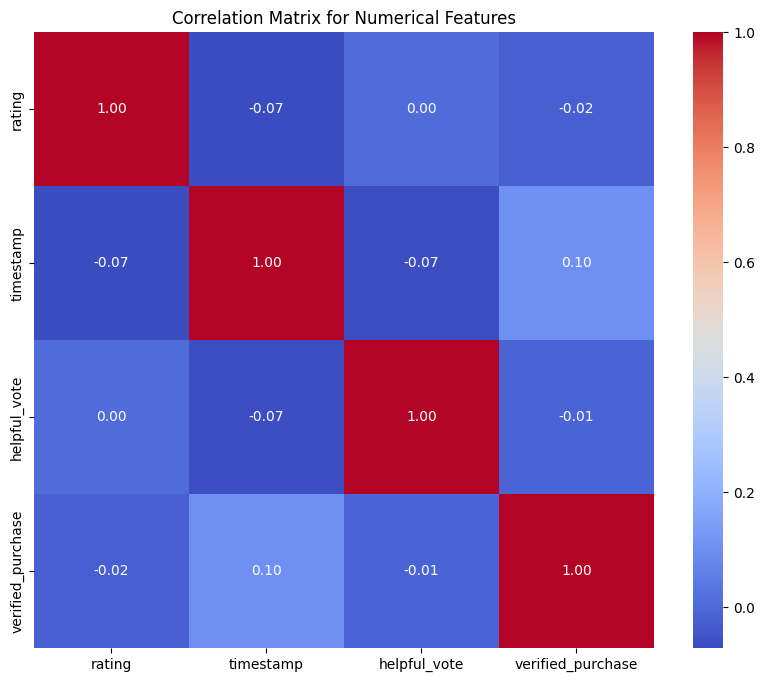

In [9]:
numerical_columns = df.select_dtypes(include=['float64', 'int64', 'bool']).columns
correlation_matrix = df[numerical_columns].corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for Numerical Features")
plt.show()

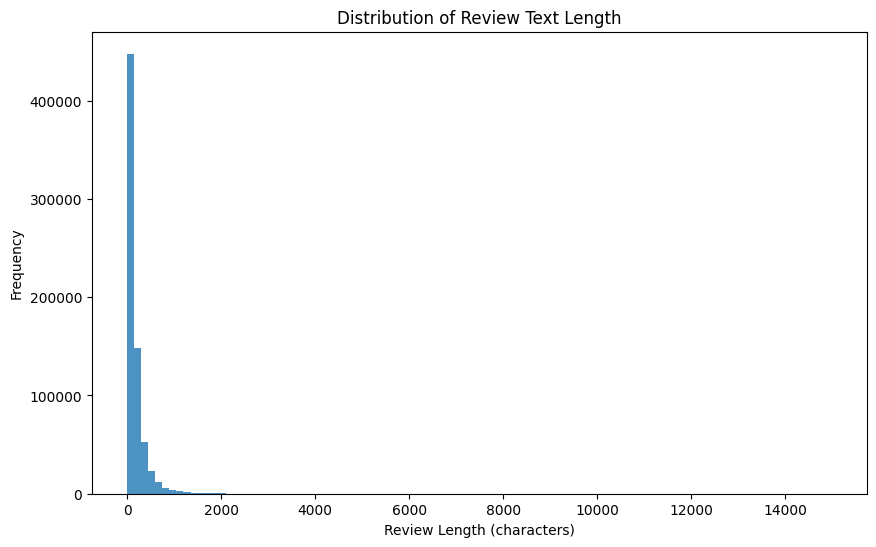

In [10]:
df['text_length'] = df['text'].apply(lambda x: len(x) if pd.notnull(x) else 0)

plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=100, alpha=0.8)
plt.title("Distribution of Review Text Length")
plt.xlabel("Review Length (characters)")
plt.ylabel("Frequency")
plt.show()